In [9]:
from google.colab import files
upload = files.upload()

Saving spambase_train.csv to spambase_train.csv


In [3]:
from google.colab import files
upload = files.upload()

Saving spambase_test.csv to spambase_test.csv


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_curve, auc

# DATA_SET_PATH
TRAIN_INPUT = pd.read_csv('spambase_train.csv')
TEST_INPUT = pd.read_csv('spambase_test.csv')

In [14]:
TRAIN_INPUT.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam,ID
0,0.00,0.0,1.12,0.0,0.56,0.00,0.0,0.00,0.00,0.56,...,0.101,0.00,0.606,0.000,0.0,2.360,19,144,1,29
1,0.32,0.0,0.64,0.0,0.32,0.32,0.0,1.61,0.32,0.64,...,0.160,0.00,1.178,0.107,0.0,3.613,63,318,1,3792
2,0.00,0.0,0.00,0.0,0.34,0.00,0.0,0.34,0.00,1.70,...,0.055,0.11,0.000,0.000,0.0,1.421,8,91,0,1317
3,0.19,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.108,0.00,0.000,0.108,0.0,2.634,23,303,0,3309
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.746,0.00,0.000,0.000,0.0,1.687,4,27,0,3342


In [15]:
TEST_INPUT.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ID
0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.470,5,25,1981
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.555,3.000,14,348,1940
2,0.00,0.00,0.00,0.0,0.53,0.00,0.00,0.26,0.00,0.00,...,0.0,0.000,0.0,0.555,0.000,1.157,19.260,107,886,4260
3,0.09,0.19,0.98,0.0,0.78,0.78,0.49,0.00,0.78,0.19,...,0.0,0.102,0.0,0.393,0.145,0.014,8.323,669,1415,3200
4,0.00,0.42,0.42,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.075,0.0,0.600,0.300,0.000,4.020,82,197,3082


In [16]:
X = TRAIN_INPUT.drop(columns=['ID','spam'],axis=1)
Y = TRAIN_INPUT['spam']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

#SVM




In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
***ما اعطت اكيورسي عالي

#RandomForest


In [20]:
from sklearn.ensemble import RandomForestClassifier


In [21]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [1236, 800, 842,950],
    'max_depth': [1526, 80, 1300, 70],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize the RandomForest model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(rf, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found:  {'max_depth': 70, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


In [23]:
model = RandomForestClassifier(max_depth = 50, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)

In [24]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=500)

In [42]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

In [43]:
y_pred = model.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9627329192546584


In [45]:
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.9538461538461538


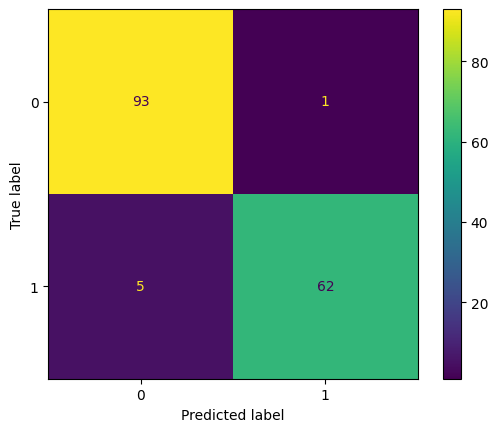

In [46]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

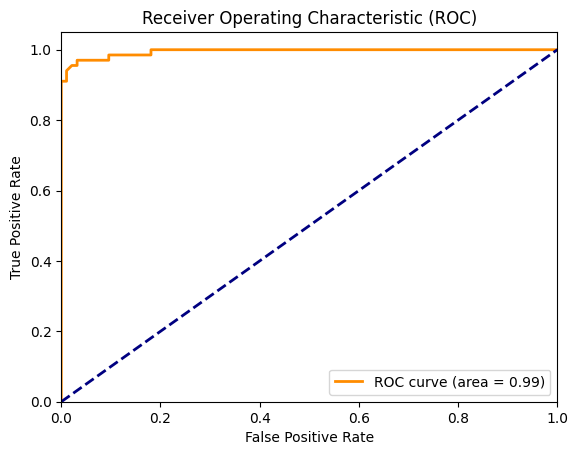

In [48]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

AUC = 1.0: نموذج مثالي.

AUC = 0.5: أداء النموذج يعادل التخمين العشوائي.

AUC < 0.5: أداء النموذج أسوأ من التخمين العشوائي.


هاد البلوت عشان يقيم اداء النموذج

In [ ]:
ID = TEST_INPUT['ID']
TEST_INPUT.drop(columns='ID',inplace=True)

In [ ]:
ID

0       1981
1       1940
2       4260
3       3200
4       3082
        ... 
1376    2757
1377    1986
1378    2972
1379    3568
1380    1310
Name: ID, Length: 1381, dtype: int64

In [ ]:
prediction = model.predict(TEST_INPUT)

In [ ]:
my_submission = pd.DataFrame({'ID':ID,'spam':prediction})
my_submission.head()

,ID,spam
0,1981,0
1,1940,0
2,4260,1
3,3200,1
4,3082,1


In [ ]:
my_submission.to_csv('RFwithGSL29.csv', index=False)